# "Test page"
> "This is where the summary goes!"

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [fastpages, r, coupon]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

# Jupyter Notebook Demo

This is a proof-of-concept demonstration of making a Jupyter Notebook blog post.

## Question (The Coupon Collector)

There are 10 different Super Mario LEGO character packs. Packs are sold in obscure bags, and a customer cannot tell which character is contained in a bag being purchased. How many bags would it take, on average, for someone to complete the set?

## Algebraic solution

This is the well-known "Coupon Collector" problem. The crux of the idea is to consider a sequence of geometric variables representing "advancement" to different states.

* The first character will always be new.
* Next, we consider how many bags will be required to get to our second new character. A given back has a $9/10$ chance of providing a new character and a $1/10$ chance of not doing so; this is a geometric random variable whose expectation is therefore $10/9$.
* For the third new character, the same reasoning shows an expected wait time of $10/8$.

and so on. The total expected value is therefore
$$1 + \frac{10}{9} + \frac{10}{8} + \dots + \frac{10}{1} \approx 29.2897.$$

## Monte Carlo solution

In [1]:
library(ggplot2)
library(dplyr)

coupon <- function(){
    i <- 0
    collected <- rep(0, 10)
    while(sum(collected) < 10){
        i <- i + 1
        collected[sample(1:10, 1)] <- 1
    }
    i
}

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [35]:
set.seed(5920)
coupon_trials <- replicate(100000, coupon())

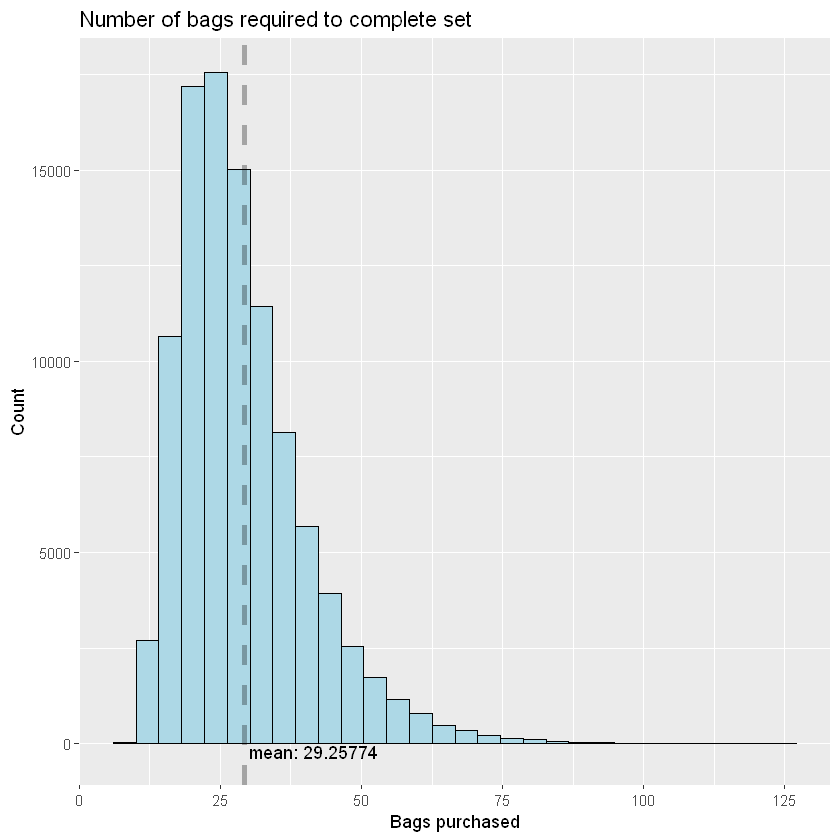

In [38]:
data.frame(bags = coupon_trials) %>%
  ggplot(aes(x = bags)) +
    geom_histogram(bins = 30, color = "black", fill = "lightblue") +
    geom_vline(xintercept = mean(coupon_trials), color = "black", lwd = 1.5, lty = 2, alpha = 0.3) +
    annotate("text", x = mean(coupon_trials), y = -200, hjust = 0,
             label = paste0(" mean: ", mean(coupon_trials))) +
    labs(x = "Bags purchased", y = "Count", title = "Number of bags required to complete set")